In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))
from src.kalman_filter import KalmanFilter
from src.data_processing import *
from src.plotting import *
import pandas as pd
import numpy as np

In [2]:
organized_data_folder = "/ceph/sjones/projects/sequence_squad/organised_data/animals/EJT178_implant1/recording7_30-03-2022/"
processed_data_folder = "/nfs/gatsbystor/nicholasg/striatal_replay/processed_data"

In [3]:
back_pos_df = pd.read_hdf(os.path.join(organized_data_folder, "video", "tracking", "2_task", "back_2022-03-30T15_02_32DLC_resnet50_task-tracking_backviewApr6shuffle1_800000.h5"), "df_with_missing")
back_pos_df

scorer    DLC_resnet50_task-tracking_backviewApr6shuffle1_800000              \
bodyparts                                               left_ear               
coords                                                         x           y   
0                                                 314.677002      613.623718   
1                                                 313.086517      614.376526   
2                                                 312.222565      613.870911   
3                                                 311.177704      612.852966   
4                                                 310.787781      611.551819   
...                                                      ...             ...   
164722                                            989.293640      857.788208   
164723                                            988.615112      857.374207   
164724                                            988.083984      856.993591   
164725                                            955.039307      866.663452   
164726                                            956.424561      867.342285   

scorer                                                                \
bodyparts               right_ear                        head_centre   
coords    likelihood            x           y likelihood           x   
0           0.999978   415.459747  584.644348   0.999604  366.061066   
1           0.999953   413.810455  585.311279   0.999321  365.491608   
2           0.999975   413.822693  586.121765   0.998607  364.315460   
3           0.999987   413.189178  586.227722   0.998934  363.241913   
4           0.999992   412.628723  586.373962   0.998626  362.535126   
...              ...          ...         ...        ...         ...   
164722      0.000330   986.457764  860.715210   0.000199  987.314392   
164723      0.000512   986.021301  860.786255   0.000290  986.755371   
164724      0.000154  1007.383057  859.719727   0.000096  972.169067   
164725      0.000064  1005.881165  860.325500   0.000041  973.527893   
164726      0.000069  1005.867676  860.115112   0.000076  973.936096   

scorer                                                                  \
bodyparts                        implant_centre                          
coords              y likelihood              x           y likelihood   
0          584.250671   0.999597     359.682373  539.862183   0.999956   
1          585.148315   0.999591     358.531738  539.472961   0.999967   
2          585.561768   0.999709     357.101898  539.707642   0.999975   
3          585.304504   0.999731     356.216064  539.854858   0.999977   
4          584.520691   0.999748     355.045410  539.468933   0.999981   
...               ...        ...            ...         ...        ...   
164722     862.659119   0.000177     989.887695  862.560730   0.996058   
164723     862.310120   0.000294     991.325806  863.018066   0.996171   
164724     875.815002   0.000203     991.324463  862.764893   0.979532   
164725     875.611389   0.000064     994.681335  864.246704   0.958143   
164726     876.193542   0.000110     995.533508  864.306396   0.971416   

scorer                                        
bodyparts   tail_base                         
coords              x           y likelihood  
0          526.411133  748.714844   0.999934  
1          526.559326  748.799683   0.999946  
2          526.644531  748.966431   0.999948  
3          526.458740  749.343933   0.999941  
4          526.424377  749.724487   0.999955  
...               ...         ...        ...  
164722     986.789673  858.737671   0.000325  
164723     986.416260  858.764221   0.000532  
164724     773.706116  956.426575   0.000122  
164725     773.701233  956.396301   0.000094  
164726     773.485901  956.369995   0.000062  

[164727 rows x 15 columns]

In [4]:
# Only run this once to update the trajectories data frame with smoothed position data. This will overwrite the file called "trajectories.csv" in the processed_data_folder. 
# Skip this if you wish to use the raw position data or if the position has already been updated.

keypoints = calculate_average_keypoint(back_pos_df, keypoint_cols=["head_centre"])
y = keypoints.values.T
kf = KalmanFilter(pos_x0=y[0,0], pos_y0=y[1,0])

training = int(len(keypoints) * 0.1)
print(f"Training on: {training}")
kf.optimize(y[:training], max_iter = 5, disp = True)
means, std_devs = kf.smooth(y)

keypoints["smoothed_x_position"] = means[0, 0, :]
keypoints["smoothed_y_position"] = means[3, 0, :]
keypoints["velocity"] = np.sqrt(means[1, 0, :] ** 2 + means[4, 0, :] ** 2)
keypoints["acceleration"] = np.sqrt(means[2, 0, :] ** 2 + means[5, 0, :] ** 2)

keypoints.to_csv(os.path.join(processed_data_folder, f"keypoints_{training}.csv"))
display(keypoints)

Training on: 1647
Iteration: 1
optim criterion: 3051556.949969
sigma_ax=31.919240
sigma_ay=31.919240
sqrt_diag_R:
[100.9375  90.    ]
m0:
[3.69492888e+02 4.68750000e-05 4.68750000e-05 5.89728021e+02
 4.68750000e-05 4.68750000e-05]
sqrt_diag_V0:
[0.00100938 0.00100938 0.00100938 0.00100938 0.00100938 0.00100938]
Iteration: 2
optim criterion: 3051556.949969
sigma_ax=31.919240
sigma_ay=31.919240
sqrt_diag_R:
[100.9375  90.    ]
m0:
[3.69492888e+02 4.68750000e-05 4.68750000e-05 5.89728021e+02
 4.68750000e-05 4.68750000e-05]
sqrt_diag_V0:
[0.00100938 0.00100938 0.00100938 0.00100938 0.00100938 0.00100938]
Iteration: 3
optim criterion: 3051556.949969
sigma_ax=31.919240
sigma_ay=31.919240
sqrt_diag_R:
[100.9375  90.    ]
m0:
[3.69492888e+02 4.68750000e-05 4.68750000e-05 5.89728021e+02
 4.68750000e-05 4.68750000e-05]
sqrt_diag_V0:
[0.00100938 0.00100938 0.00100938 0.00100938 0.00100938 0.00100938]
Iteration: 4
optim criterion: 3051556.949969
sigma_ax=31.919240
sigma_ay=31.919240
sqrt_diag_R:
[

/nfs/gatsbystor/nicholasg/striatal_replay/.venv/lib/python3.8/site-packages/lds/learning.py:151: RuntimeWarning: Maximum number of iterations has been exceeded.
  opt_res = scipy.optimize.minimize(optim_criterion, x0,


ValueError: mean must be 1 dimensional

In [5]:
trajectories = pd.read_csv(os.path.join(processed_data_folder, "trajectories.csv"), index_col=0)
ports = pd.read_csv(os.path.join(processed_data_folder, "ports.csv"), index_col=0)
display(ports)
display(trajectories)

,x_position,y_position,linear_position
port2,535.420206,627.221570,0.000000
port1,397.396156,621.255591,138.152927
port6,537.683478,494.916093,326.944349
port3,677.354724,623.760257,516.967704
port7,673.807230,497.948122,642.829843


,trial_id,camera_idx,camera_time,ephys_time,linear_position,x_position,y_position,port1,port2
22191,1,22191,369.857173,4800.884355,0.000000,670.492310,513.852478,2,1
22192,1,22192,369.873841,4800.901010,-0.607927,671.156128,512.822449,2,1
22193,1,22193,369.890509,4800.917665,-0.010407,670.305847,513.338928,2,1
22194,1,22194,369.907178,4800.934320,0.082560,670.071716,513.164001,2,1
22195,1,22195,369.923846,4800.950974,0.010824,670.314087,513.453674,2,1
...,...,...,...,...,...,...,...,...,...
163228,276,163228,2720.473922,7150.310765,597.237558,650.354614,576.198364,3,7
163229,276,163229,2720.490593,7150.327440,606.095453,654.041809,570.472900,3,7
163230,276,163230,2720.507265,7150.344115,616.064659,655.980164,564.733582,3,7
163231,276,163231,2720.523936,7150.360789,627.483287,657.201050,558.478149,3,7


<Axes: >

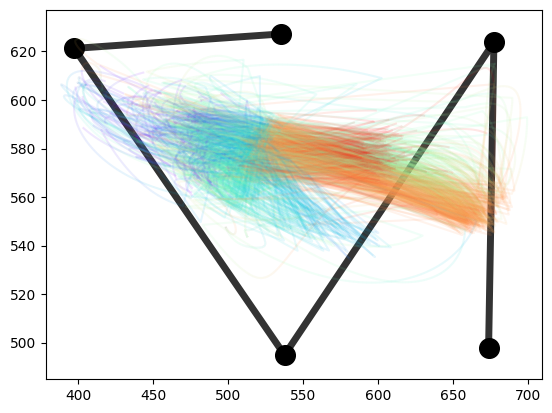

In [9]:
plot_all_trajectories(trajectories, ports, x_col="smoothed_x_position", y_col="smoothed_y_position")

<Axes: >

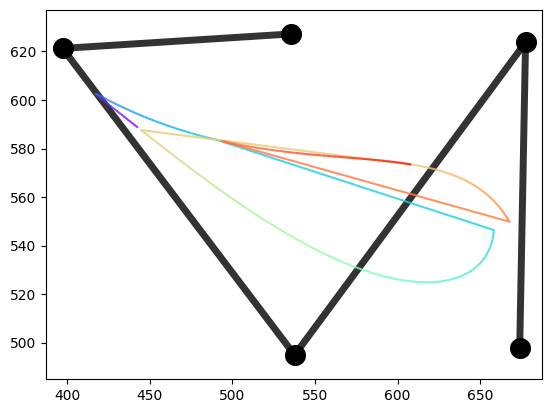

In [10]:
plot_single_trajectory(trajectories, ports, trial_id = 1, x_col="smoothed_x_position", y_col="smoothed_y_position")